# Introduction:
**The online store Ice sells video games all over the world.
User reviews, expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales were provided in order to identify patterns that determine whether a game succeeds or not. Analysing the data set should provide insights that may be applied when plannng a marketing campaign for 2017.**

# Step 1. Open the data file and study the general information

In [771]:
# Loading all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats as st
import sidetable
%matplotlib inline

In [772]:
# Loading data  
try:
    games=pd.read_csv('games.csv')
except :
    games=pd.read_csv('/datasets/games.csv')

In [773]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [774]:
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10330,Aqua Aqua,PS2,2000.0,Puzzle,0.05,0.04,0.00,0.01,79.0,tbd,E
11873,Harukanaru Toki no Naka de 4,PS2,2008.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
10660,LEGO Rock Raiders,PS,1999.0,Strategy,0.06,0.04,0.00,0.01,NaN,NaN,NaN
4407,LEGO Star Wars II: The Original Trilogy,XB,2006.0,Action,0.33,0.10,0.00,0.02,85.0,8.6,E10+
2775,Crysis 2,PC,2011.0,Action,0.16,0.45,0.00,0.13,86.0,6.8,M


In [775]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [776]:
#missing data
missing_original = games.stb.missing(style=True)
missing_original

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


## Missing a lot of data on Critic_Score, Rating and User_Score

In [777]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Step 2. Prepare the data

**Replace the column names (make them lowercase)**

In [778]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [779]:
games.columns = games.columns.str.lower()

In [780]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Convert the data to the required types**

In [781]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- year_of_release ==> datetime

**Here we have a problem, there are missing values but cannot be filled with 0 because they are supposed to be dates.**
- I built 2 functions to help extract the most out of the 'name column


In [782]:
#games['year_of_release'] = pd.to_datetime(games['year_of_release'],format='%Y')

In [783]:
games['year_of_release'].isna().sum()

269

In [784]:
games[games['year_of_release'].isna()].head(2)
      

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E


In [785]:
type2= type(games.iloc[183]['year_of_release'])
type2

numpy.float64

In [786]:
missing_years_df = games[games['year_of_release'].isna()]
missing_years_df.groupby('platform').count().sort_values('name',ascending=False).head()

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
platform,,,,,,,,,,
PS2,34,0,34,34,34,34,34,23,25,25
Wii,34,0,34,34,34,34,34,17,24,25
DS,30,0,30,30,30,30,30,9,16,18
X360,30,0,30,30,30,30,30,22,22,22
PS3,25,0,25,25,25,25,25,16,16,17


In [787]:
name_list = missing_years_df['name'].to_list()
#name_list

In [788]:
def extract_year(df):
    '''This function splits the Name into separate strings and then compares each string type, 
    if the type is int return it'''
    title= df['name'].split()
    for word in title:
        try:
            if isinstance(int(word), int):
                return  int(word)
        except:
            continue 

In [789]:
missing_years_df['year1'] = missing_years_df.apply(extract_year,axis=1)

C:\Users\Thor 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [790]:
import re
 
def extract_year2(df):
    '''using regex - this function extracts the digits in each string,
    it also deals with specific cases like 2k6 or 07'''
    # initializing string 
    test_string = df['name']    

    temp = re.findall(r'\d+', test_string)
    res = list(map(int, temp))
    
    # salvaging specific cases
    if res:
        if res == [2,6]:
            year = 2006
        elif res[0] ==[2,8]:
            year = 2008
        elif res[0] in [6]:
            year = 2006
        elif res[0] in [7]:
            year = 2007
        elif res[0] in [11]:
            year = 2011
        elif res[0] in [99]:
            year = 1999  
        else:
            year = res[0]
    else:
        year = np.nan
        
    if year>=1999:
        return year
    else:
        return np.nan

In [791]:
missing_years_df['year2'] = missing_years_df.apply(extract_year2,axis=1)

C:\Users\Thor 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [792]:
missing_years_df['year2'].isna().sum()

244

In [793]:
missing_years_df[missing_years_df['year1'].notna()][['name','year1','year2']].head()

,name,year1,year2
183,Madden NFL 2004,2004.0,2004.0
377,FIFA Soccer 2004,2004.0,2004.0
475,wwe Smackdown vs. Raw 2006,2006.0,2006.0
719,Call of Duty 3,3.0,NaN
1301,Triple Play 99,99.0,1999.0


In [794]:
missing_years_df[missing_years_df['year2'].notna()][['name','year1','year2']].head()

,name,year1,year2
183,Madden NFL 2004,2004.0,2004.0
377,FIFA Soccer 2004,2004.0,2004.0
475,wwe Smackdown vs. Raw 2006,2006.0,2006.0
1301,Triple Play 99,99.0,1999.0
1650,NASCAR Thunder 2003,2003.0,2003.0


In [795]:
games['year_of_release'].isna().sum()

269

In [796]:
# replace the nan with the extracted years
games.loc[games['year_of_release'].isna(),'year_of_release'] = missing_years_df['year2']

In [797]:
games['year_of_release'].isna().sum()

244

In [798]:
269-244

25

**only manage to extract the year out 25 rows, not much**

In [799]:
games.stb.missing(style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,244,"16,715",1.46%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


**I may consider dropping the rows with missing years as their missing percentage is low**

# **user_score**

**Note:Here I researched the user_score column untill it was better understood, after that I  arrived at a strategy**

In [800]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
2.3       2
0.7       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [801]:
games['user_score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: object

# **Researching tbd**

In [802]:
tbd_df = games[games['user_score']=='tbd']
tbd_p = tbd_df.shape[0] / games['user_score'].isna().sum()
tbd_p2 = tbd_df.shape[0] / games['user_score'].shape[0]

print(" TBD's are {:.0%} of the missing data  \n\n And are {:.0%} of the user_score".format(tbd_p,tbd_p2))

 TBD's are 36% of the missing data  

 And are 15% of the user_score


In [803]:
tbd_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [804]:
#lets see which platforms have the most tbd's
tbd_df.stb.freq(['platform'],style=True,cum_cols=True)

,platform,count,percent,cumulative_count,cumulative_percent
0,DS,756,31.19%,756,31.19%
1,Wii,440,18.15%,"1,196",49.34%
2,GBA,262,10.81%,"1,458",60.15%
3,PS2,240,9.90%,"1,698",70.05%
4,XB,150,6.19%,"1,848",76.24%
5,PSP,123,5.07%,"1,971",81.31%
6,GC,103,4.25%,"2,074",85.56%
7,PS3,87,3.59%,"2,161",89.15%
8,X360,84,3.47%,"2,245",92.62%
9,3DS,56,2.31%,"2,301",94.93%


**Strategy :** 
1. exclude tbd's
2. exclude nans
3. get median per platform
4. replace tbd and nans**

**************************************************************

In [805]:
no_tbd =  games.loc[games['user_score']!='tbd',:]
no_tbd.shape

(14291, 11)

In [806]:
no_nans_and_tbd = no_tbd.loc[no_tbd['user_score'].notna(),:]
no_nans_and_tbd['user_score'] = pd.to_numeric(no_nans_and_tbd['user_score'])

C:\Users\Thor 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [807]:
no_nans_and_tbd.shape[0]

7590

In [808]:
no_nans_and_tbd.loc[no_nans_and_tbd['platform']=='PS2','user_score']

17       9.0
24       8.7
28       8.4
38       8.5
48       8.5
        ... 
16050    7.9
16152    6.8
16287    8.1
16429    9.2
16591    6.8
Name: user_score, Length: 1241, dtype: float64

In [809]:
plt_list = no_nans_and_tbd['platform'].unique().tolist()
plt_list ,len(plt_list)

(['Wii',
  'DS',
  'X360',
  'PS3',
  'PS2',
  '3DS',
  'PS4',
  'PS',
  'XB',
  'PC',
  'PSP',
  'WiiU',
  'GC',
  'GBA',
  'XOne',
  'PSV',
  'DC'],
 17)

In [810]:
'''this for loop will gather the median for each platform in plt_list'''
plt_median =[]
for platform in plt_list:
    plt = games.loc[(games['platform']==platform)&
          (games.user_score.notna())&
          (games.user_score!='tbd'),'user_score']
    plt = pd.to_numeric(plt)
    plt_md = plt.median()
    plt_median.append(plt_md)
    
print(plt_median)

[7.15, 7.4, 7.0, 7.1, 8.0, 7.1, 7.0, 8.3, 8.0, 7.5, 7.5, 7.1, 7.95, 8.0, 6.8, 7.6, 8.8]


In [811]:
median_df = pd.DataFrame(zip(plt_list,plt_median),columns=['platform','median'])
median_df

,platform,median
0,Wii,7.15
1,DS,7.40
2,X360,7.00
3,PS3,7.10
4,PS2,8.00
5,3DS,7.10
6,PS4,7.00
7,PS,8.30
8,XB,8.00
9,PC,7.50


# Which platforms do not have a median for user_score?

In [812]:
median_scr_pltfrms = median_df['platform'].tolist()
all_platforms= games.pivot_table(index='platform').index.tolist()


In [813]:
pltfr_no_usr_scr =[]
for p in all_platforms:
    #print(p,' ', p in index2)
    if p not in median_scr_pltfrms:
        pltfr_no_usr_scr.append(p)
        
print(pltfr_no_usr_scr,len(pltfr_no_usr_scr))

['2600', '3DO', 'GB', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'SAT', 'SCD', 'SNES', 'TG16', 'WS'] 14


In [814]:
#confirmiing 
games.loc[games['platform']=='WS','user_score']

3926     NaN
6110     NaN
6650     NaN
8039     NaN
8294     NaN
14224    NaN
Name: user_score, dtype: object

In [815]:
games.query(' platform in  @pltfr_no_usr_scr').shape[0]

1120

In [816]:
print('Platforms with no user_score are {:.0%} of the total set'.format(
    games.query(' platform in  @pltfr_no_usr_scr').shape[0]/games.shape[0]
))

Platforms with no user_score are 7% of the total set


# droping missing years 

In [817]:
games.shape[0]

16715

In [818]:
#droping years here
#games = games.drop(games[games['year_of_release'].isna()].index) - old code
games.dropna(subset=['year_of_release'], inplace=True)

In [819]:
games.shape[0]

16471

In [820]:
games[games['year_of_release'].isna()].shape[0]

0

In [821]:
games.shape[0]

16471

# how can we fill the tbd's and nans

**Startegy:**
1. Try and see if we can build a dictionary mapping the platform, year and the median score
2. Replace the tbd's
3. Replace the nans where possible
4. Review the missing values in the set

**Here lets create a table that has the median user_score per year for each platform. I want to create a dictionary to map the scores where they might fit**

In [822]:
usr_scr_medians_yr = no_nans_and_tbd.pivot_table(index=['platform','year_of_release'],values='user_score',aggfunc='median')
usr_scr_medians_yr.columns=['median_per_year']
usr_scr_medians_yr

median_per_year
platform year_of_release                 
3DS      2011.0                      6.60
         2012.0                      7.50
         2013.0                      6.80
         2014.0                      6.90
         2015.0                      7.60
...                                   ...
XB       2008.0                      5.50
XOne     2013.0                      5.90
         2014.0                      6.95
         2015.0                      6.60
         2016.0                      6.80

[147 rows x 1 columns]

In [823]:
usr_scr_medians_yr.shape[0]

147

In [824]:
usr_scr_medians_yr.index

MultiIndex([( '3DS', 2011.0),
            ( '3DS', 2012.0),
            ( '3DS', 2013.0),
            ( '3DS', 2014.0),
            ( '3DS', 2015.0),
            ( '3DS', 2016.0),
            (  'DC', 1999.0),
            (  'DC', 2000.0),
            (  'DC', 2001.0),
            (  'DS', 2004.0),
            ...
            (  'XB', 2003.0),
            (  'XB', 2004.0),
            (  'XB', 2005.0),
            (  'XB', 2006.0),
            (  'XB', 2007.0),
            (  'XB', 2008.0),
            ('XOne', 2013.0),
            ('XOne', 2014.0),
            ('XOne', 2015.0),
            ('XOne', 2016.0)],
           names=['platform', 'year_of_release'], length=147)

**practicing on how to access each platform**

In [825]:
#df.loc[("bar", "two")]
usr_scr_medians_yr.loc[('3DS')]

,median_per_year
year_of_release,
2011.0,6.60
2012.0,7.50
2013.0,6.80
2014.0,6.90
2015.0,7.60
2016.0,7.25


In [826]:
usr_scr_medians_yr.loc[('XOne',2016)]

median_per_year    6.8
Name: (XOne, 2016.0), dtype: float64

**********************************************************

**Lets summarize the user_score medians per platform only.( My thought here was that trying to map to platform and year is looking to be not simple and more complicated than expected**)

In [827]:
usr_scr_medians = no_nans_and_tbd.pivot_table(index=['platform'],values='user_score',aggfunc='median')
usr_scr_medians.head()

,user_score
platform,
3DS,7.10
DC,8.80
DS,7.40
GBA,8.00
GC,7.95


**Creating a dictionary to use with map**

In [828]:
#dcitionary
usr_scr_md_dict = usr_scr_medians.to_dict()
usr_scr_md_dict

{'user_score': {'3DS': 7.1,
  'DC': 8.8,
  'DS': 7.4,
  'GBA': 8.0,
  'GC': 7.95,
  'PC': 7.5,
  'PS': 8.3,
  'PS2': 8.0,
  'PS3': 7.1,
  'PS4': 7.0,
  'PSP': 7.5,
  'PSV': 7.6,
  'Wii': 7.15,
  'WiiU': 7.1,
  'X360': 7.0,
  'XB': 8.0,
  'XOne': 6.8}}

In [829]:
usr_scr_md_dict =usr_scr_md_dict['user_score']

In [830]:
usr_scr_md_dict

{'3DS': 7.1,
 'DC': 8.8,
 'DS': 7.4,
 'GBA': 8.0,
 'GC': 7.95,
 'PC': 7.5,
 'PS': 8.3,
 'PS2': 8.0,
 'PS3': 7.1,
 'PS4': 7.0,
 'PSP': 7.5,
 'PSV': 7.6,
 'Wii': 7.15,
 'WiiU': 7.1,
 'X360': 7.0,
 'XB': 8.0,
 'XOne': 6.8}

In [831]:
#checking the 3DS platform 
games.loc[games['platform']=='3DS',['platform','user_score']].head(2)

,platform,user_score
33,3DS,NaN
40,3DS,8.2


In [832]:
# these indexs will help test if the procedure worked
indx3ds = games.loc[(games['platform']=='3DS')&(games['user_score']=='tbd')].index
indexWii = games.loc[(games['platform']=='Wii')&(games['user_score']=='tbd')].index
games.loc[(games['platform']=='3DS')&(games['user_score']=='tbd')].head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6186,Moshi Monsters: Moshlings Theme Park,3DS,2012.0,Misc,0.13,0.13,0.00,0.03,NaN,tbd,E
6609,Zoo Resort 3D,3DS,2011.0,Simulation,0.11,0.09,0.03,0.02,NaN,tbd,E


**Mapping the dictionary to the 'tbd' values in user_score**

In [833]:
# using map  :  df1['value'] = df1['condition'].map(df2.set_index('condition')['value'])
games.loc[games['user_score']=='tbd',['user_score']]  = games['platform'].map(usr_scr_md_dict)

In [834]:
#check that it worked  for 3DS -no tbd's
games.loc[indx3ds].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6186,Moshi Monsters: Moshlings Theme Park,3DS,2012.0,Misc,0.13,0.13,0.00,0.03,NaN,7.1,E
6609,Zoo Resort 3D,3DS,2011.0,Simulation,0.11,0.09,0.03,0.02,NaN,7.1,E
6627,How to Train Your Dragon 2,3DS,2014.0,Adventure,0.04,0.19,0.00,0.02,NaN,7.1,E10+
7024,Wipeout 2,3DS,2011.0,Misc,0.22,0.00,0.00,0.01,NaN,7.1,E
7357,LEGO Ninjago: Shadow of Ronin,3DS,2015.0,Action,0.05,0.11,0.04,0.01,NaN,7.1,E10+


In [835]:
#check that it worked  for Wii -no tbd's
games.loc[indexWii].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,7.15,E
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,7.15,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,7.15,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,7.15,E
1070,Game Party 3,Wii,2009.0,Puzzle,1.40,0.16,0.0,0.12,37.0,7.15,E


***************************
**Now lets deal with the nans in user_score**

In [836]:

games.loc[games['platform']=='X360','user_score'].isna().sum()

205

**Filling nans with the help of the dictionary with the medians scores and the map method**

In [837]:
#filling nans df.B = df.B.fillna(df.A.map(dict))
games.loc[games['user_score'].isna(),['user_score']]  = games['user_score'].fillna(games['platform'].map(usr_scr_md_dict))

In [838]:
# checking X360 nans again 
games.loc[games['platform']=='X360','user_score'].isna().sum()

0

In [839]:
#let see the total nans in user_score
games['user_score'].isna().sum()

1099

***************************
**Lets make sure that the user_score column is the right type so we can work with it accordingly**

In [840]:
#cheking type df["2nd"] = pd.to_numeric(df["2nd"])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16471 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16469 non-null  object 
 1   platform         16471 non-null  object 
 2   year_of_release  16471 non-null  float64
 3   genre            16469 non-null  object 
 4   na_sales         16471 non-null  float64
 5   eu_sales         16471 non-null  float64
 6   jp_sales         16471 non-null  float64
 7   other_sales      16471 non-null  float64
 8   critic_score     8002 non-null   float64
 9   user_score       15372 non-null  object 
 10  rating           9786 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.1+ MB


In [841]:
# casting to the type we need - float64
games['user_score'] = pd.to_numeric(games['user_score'])

In [842]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16471 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16469 non-null  object 
 1   platform         16471 non-null  object 
 2   year_of_release  16471 non-null  float64
 3   genre            16469 non-null  object 
 4   na_sales         16471 non-null  float64
 5   eu_sales         16471 non-null  float64
 6   jp_sales         16471 non-null  float64
 7   other_sales      16471 non-null  float64
 8   critic_score     8002 non-null   float64
 9   user_score       15372 non-null  float64
 10  rating           9786 non-null   object 
dtypes: float64(7), object(4)
memory usage: 2.1+ MB


***************************
**Lets make a quick review and reminder of the missing values- first the original missing values, then the latest, we can compare and see the progress**

In [843]:
missing_original

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


In [844]:
games.stb.missing(style=True)

,missing,total,percent
critic_score,"8,469","16,471",51.42%
rating,"6,685","16,471",40.59%
user_score,"1,099","16,471",6.67%
name,2,"16,471",0.01%
genre,2,"16,471",0.01%
platform,0,"16,471",0.00%
year_of_release,0,"16,471",0.00%
na_sales,0,"16,471",0.00%
eu_sales,0,"16,471",0.00%
jp_sales,0,"16,471",0.00%


# user_score missing data went from 40% to 6.67%
********************************************
********************************************


## critic_score

1. Get the median per platform
2. Create dictionary
3.  Fill nans with map

In [845]:
games['critic_score'].isna().sum()

8469

In [846]:
critic_scr_medians_gnr = games.pivot_table(index=['platform','genre'],values='critic_score',aggfunc=['mean','median'])

In [847]:
critic_scr_medians_gnr

mean       median
                      critic_score critic_score
platform genre                                 
3DS      Action          62.982759         62.5
         Adventure       67.500000         63.5
         Fighting        68.857143         64.0
         Misc            69.100000         71.5
         Platform        72.444444         71.0
...                            ...          ...
XOne     Role-Playing    80.777778         83.0
         Shooter         77.656250         80.0
         Simulation      59.000000         59.0
         Sports          71.093750         78.0
         Strategy        70.000000         70.0

[197 rows x 2 columns]

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pretty good usage of pivot_table! You've got very informative table!
</div>

In [848]:
#df.loc[ ('London' , ['2019-07-01','2019-07-02'] ) ,  'Day']
critic_scr_medians_gnr.index

MultiIndex([( '3DS',       'Action'),
            ( '3DS',    'Adventure'),
            ( '3DS',     'Fighting'),
            ( '3DS',         'Misc'),
            ( '3DS',     'Platform'),
            ( '3DS',       'Puzzle'),
            ( '3DS',       'Racing'),
            ( '3DS', 'Role-Playing'),
            ( '3DS',      'Shooter'),
            ( '3DS',   'Simulation'),
            ...
            ('XOne',    'Adventure'),
            ('XOne',     'Fighting'),
            ('XOne',         'Misc'),
            ('XOne',     'Platform'),
            ('XOne',       'Racing'),
            ('XOne', 'Role-Playing'),
            ('XOne',      'Shooter'),
            ('XOne',   'Simulation'),
            ('XOne',       'Sports'),
            ('XOne',     'Strategy')],
           names=['platform', 'genre'], length=197)

In [849]:
#accessing multi index
critic_scr_medians_gnr.loc[('XOne','median')]

,critic_score
genre,
Action,74.0
Adventure,81.0
Fighting,67.0
Misc,73.5
Platform,75.0
Racing,75.0
Role-Playing,83.0
Shooter,80.0
Simulation,59.0


In [850]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [851]:
crtc_scr_medians= games.pivot_table(index='platform',values='critic_score',aggfunc='median')
crtc_scr_medians.head()

,critic_score
platform,
3DS,68.0
DC,88.0
DS,66.0
GBA,69.0
GC,70.0


In [852]:
crtc_scr_md_dict = crtc_scr_medians.to_dict()
crtc_scr_md_dict

{'critic_score': {'3DS': 68.0,
  'DC': 88.0,
  'DS': 66.0,
  'GBA': 69.0,
  'GC': 70.0,
  'PC': 78.0,
  'PS': 73.5,
  'PS2': 70.0,
  'PS3': 73.0,
  'PS4': 73.0,
  'PSP': 68.0,
  'PSV': 71.0,
  'Wii': 65.0,
  'WiiU': 73.5,
  'X360': 71.0,
  'XB': 72.0,
  'XOne': 76.0}}

In [853]:
crtc_scr_md_dict =crtc_scr_md_dict['critic_score']

In [854]:
games['critic_score'].isna().sum()

8469

In [855]:
games.loc[games['critic_score'].isna(),['critic_score']] = games['critic_score'].fillna(games['platform'].map(crtc_scr_md_dict))

In [856]:
games['critic_score'].isna().sum()

1099

In [857]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [858]:
games.stb.missing(style=True)

,missing,total,percent
rating,"6,685","16,471",40.59%
critic_score,"1,099","16,471",6.67%
user_score,"1,099","16,471",6.67%
name,2,"16,471",0.01%
genre,2,"16,471",0.01%
platform,0,"16,471",0.00%
year_of_release,0,"16,471",0.00%
na_sales,0,"16,471",0.00%
eu_sales,0,"16,471",0.00%
jp_sales,0,"16,471",0.00%


In [859]:
games.loc[games['critic_score'].isna(),'platform'].unique()

array(['NES', 'GB', 'SNES', 'N64', '2600', 'GEN', 'SAT', 'SCD', 'WS',
       'NG', 'TG16', '3DO', 'GG', 'PCFX'], dtype=object)

In [860]:
# the question that remains, are the critic_score indexes the same as user_score indexes?
critic_indxs = games.loc[games['critic_score'].isna(),'platform'].index
critic_indxs

Int64Index([    1,     4,     5,     9,    12,    18,    21,    22,    30,
               45,
            ...
            15430, 15462, 15463, 15560, 15633, 15655, 15788, 16207, 16693,
            16694],
           dtype='int64', length=1099)

In [861]:
user_indxs = games.loc[games['user_score'].isna(),'platform'].index
user_indxs

Int64Index([    1,     4,     5,     9,    12,    18,    21,    22,    30,
               45,
            ...
            15430, 15462, 15463, 15560, 15633, 15655, 15788, 16207, 16693,
            16694],
           dtype='int64', length=1099)

In [862]:
for i in range(len(user_indxs)):
    if user_indxs[i] != critic_indxs[i]:
        print(user_indxs[i],'!=',critic_indxs[i])
    if i == len(user_indxs) -1:
        print('they are the same indexes ')
        

they are the same indexes 


# this is a big clue. Lets see the  platforms with no user_score or critic_score

In [863]:
no_ctrc_user_scr = games.loc[user_indxs,'platform'].unique()
no_ctrc_user_scr,len(no_ctrc_user_scr)

(array(['NES', 'GB', 'SNES', 'N64', '2600', 'GEN', 'SAT', 'SCD', 'WS',
        'NG', 'TG16', '3DO', 'GG', 'PCFX'], dtype=object), 14)

*****************************

# **Ratings**
**Note : ESRB ratings were created in Sept 1994**

In [864]:
games['rating'].value_counts()

E       3936
T       2906
M       1537
E10+    1394
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [865]:
games.stb.missing(style=True)

,missing,total,percent
rating,"6,685","16,471",40.59%
critic_score,"1,099","16,471",6.67%
user_score,"1,099","16,471",6.67%
name,2,"16,471",0.01%
genre,2,"16,471",0.01%
platform,0,"16,471",0.00%
year_of_release,0,"16,471",0.00%
na_sales,0,"16,471",0.00%
eu_sales,0,"16,471",0.00%
jp_sales,0,"16,471",0.00%


In [866]:
games.groupby('year_of_release')['rating'].count().head()

year_of_release
1980.0    0
1981.0    0
1982.0    0
1983.0    0
1984.0    0
Name: rating, dtype: int64

In [867]:
games[(games['year_of_release']==1985)&(games['rating'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14470,Alter Ego,PC,1985.0,Simulation,0.0,0.03,0.0,0.01,59.0,5.8,T


# strategy  :
0. Give the ESRB rating a numeric scale
1. get rating per year and genre
2. some how map it
3. check the earlier years (1980..1994) - can they be dropped?

In [868]:
games['rating'].value_counts().index.to_list()

['E', 'T', 'M', 'E10+', 'EC', 'K-A', 'AO', 'RP']

In [869]:
games['rating'].value_counts()

E       3936
T       2906
M       1537
E10+    1394
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

EC =  Early Childhood
E = EVERYONE
E10+ = EVERYONE 10+
T = TEEN
M = Mature
RP = RATING PENDING
K-A = Kids to Adults
AO = Adults Only 

KA and E -can be merged
M - AO - can be merged (for the sake of simplifying the ratings)

In [870]:
esrb_map={'RP':0,
          'EC':1,
          'E10+':2,
          'T':3,
          'E':4,
          'K-A':4,
          'M':5,
          'AO':5}

In [871]:
#vehicles['condition']= vehicles['condition'].map(condition_dict)
games['esrb'] = games['rating'].map(esrb_map)

In [872]:
rtng_yr_gnr = games.pivot_table(index=['platform','genre'],values='esrb',aggfunc='count')
rtng_yr_gnr

esrb
platform genre             
2600     Action           0
         Adventure        0
         Fighting         0
         Misc             0
         Platform         0
...                     ...
XOne     Role-Playing     8
         Shooter         32
         Simulation       2
         Sports          34
         Strategy         2

[293 rows x 1 columns]

In [873]:
# only genre grouping
games.groupby('genre')[['rating','esrb']].count()

,rating,esrb
genre,,
Action,2147,2147
Adventure,440,440
Fighting,432,432
Misc,862,862
Platform,561,561
Puzzle,336,336
Racing,857,857
Role-Playing,770,770
Shooter,997,997


In [874]:
#what are the genres in those platform without ratings
games.loc[games['rating'].isna()].groupby('genre')['rating'].count()

genre
Action          0
Adventure       0
Fighting        0
Misc            0
Platform        0
Puzzle          0
Racing          0
Role-Playing    0
Shooter         0
Simulation      0
Sports          0
Strategy        0
Name: rating, dtype: int64

In [875]:
games.stb.freq(['rating'])

,rating,count,percent,cumulative_count,cumulative_percent
0,E,3936,40.220723,3936,40.220723
1,T,2906,29.695483,6842,69.916207
2,M,1537,15.706111,8379,85.622318
3,E10+,1394,14.244840,9773,99.867157
4,EC,8,0.081749,9781,99.948907
5,K-A,3,0.030656,9784,99.979563
6,RP,1,0.010219,9785,99.989781
7,AO,1,0.010219,9786,100.000000


*************
# There is no point in filling the earlier years(1980-1993) because ESRB didnt exist then, but we'll try to fill the missing ratings after 1994.
**Strategy :**
1. Get the ratings per Platform, Year and Genre in set
2. Map them to 'similar' games of the same platform, year and genre where the rating is missing

In [876]:
no_ratings_df = games[(games['year_of_release']>=2009)&(games['rating'].isna())]
yes_ratings_df = games[(games['year_of_release']>=2009)&(games['rating'])]

In [877]:
p_t_ratings = yes_ratings_df.pivot_table(index=['platform','year_of_release','genre'],values='esrb')

In [878]:
 p_t_ratings.index

MultiIndex([( '3DS', 2011.0,       'Action'),
            ( '3DS', 2011.0,    'Adventure'),
            ( '3DS', 2011.0,     'Fighting'),
            ( '3DS', 2011.0,         'Misc'),
            ( '3DS', 2011.0,     'Platform'),
            ( '3DS', 2011.0,       'Puzzle'),
            ( '3DS', 2011.0,       'Racing'),
            ( '3DS', 2011.0, 'Role-Playing'),
            ( '3DS', 2011.0,      'Shooter'),
            ( '3DS', 2011.0,   'Simulation'),
            ...
            ('XOne', 2016.0,    'Adventure'),
            ('XOne', 2016.0,     'Fighting'),
            ('XOne', 2016.0,         'Misc'),
            ('XOne', 2016.0,     'Platform'),
            ('XOne', 2016.0,       'Racing'),
            ('XOne', 2016.0, 'Role-Playing'),
            ('XOne', 2016.0,      'Shooter'),
            ('XOne', 2016.0,   'Simulation'),
            ('XOne', 2016.0,       'Sports'),
            ('XOne', 2016.0,     'Strategy')],
           names=['platform', 'year_of_release', 'genre'], leng

In [879]:
#accessing multi index
p_t_ratings.loc['3DS',2011].index
#print((val))

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='genre')

In [880]:
games[(games['platform']=='3DS') & (games['year_of_release']==2011) & (games['genre']=='Puzzle') & (games['esrb'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,esrb
980,Professor Layton and the Mask of Miracle,3DS,2011.0,Puzzle,0.32,0.97,0.36,0.13,68.0,7.1,NaN,NaN
9530,Puyo Puyo!! 20th Anniversary,3DS,2011.0,Puzzle,0.00,0.00,0.13,0.00,68.0,7.1,NaN,NaN


In [881]:
platforms = yes_ratings_df.groupby('platform')['platform'].count().index.tolist()

In [882]:
yes_ratings_df[yes_ratings_df['platform']=='3DS'].groupby('year_of_release').count().index.tolist()

[2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0]

In [883]:
yes_ratings_df[(yes_ratings_df['platform']=='3DS') & (yes_ratings_df['year_of_release']==2012)].groupby('genre').count().index.tolist()

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Role-Playing',
 'Simulation',
 'Sports']

# This loop maps the values to be filled . Its a bit convoluted but I couldnt figure out a more elegant solution

In [884]:
for platform in platforms:
    years = yes_ratings_df[yes_ratings_df['platform']==platform].groupby('year_of_release').count().index.tolist()
    for year in years:
        genres = yes_ratings_df[(yes_ratings_df['platform']==platform) & (yes_ratings_df['year_of_release']==year)].groupby('genre').count().index.tolist()
        for genre in genres:            
                value = (p_t_ratings.loc[platform,year,genre])
                if platform=='3DS' and  year==2011  and genre=='Puzzle':
                    print(int(value))
                games.loc[(games['platform']==platform)
                  & (games['year_of_release']==year)
                  & (games['genre']==genre) & (games['esrb'].isna()),'esrb'] = int(value)
            
            

4


In [885]:
games.loc[(games['platform']=='3DS')
          & (games['year_of_release']==2011)
          & (games['genre']=='Puzzle') & (games['esrb'].isna()),'esrb'] 

Series([], Name: esrb, dtype: float64)

In [886]:
games.loc[(games['platform']=='3DS')
          & (games['year_of_release']==2011)
          & (games['genre']=='Puzzle'),'esrb']

980      4.0
4480     4.0
5728     4.0
9530     4.0
11134    4.0
11329    4.0
11515    4.0
Name: esrb, dtype: float64

In [887]:
games.stb.missing(style=True)

,missing,total,percent
rating,"6,685","16,471",40.59%
esrb,"4,316","16,471",26.20%
critic_score,"1,099","16,471",6.67%
user_score,"1,099","16,471",6.67%
name,2,"16,471",0.01%
genre,2,"16,471",0.01%
platform,0,"16,471",0.00%
year_of_release,0,"16,471",0.00%
na_sales,0,"16,471",0.00%
eu_sales,0,"16,471",0.00%


In [888]:
missing_original

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


## Important Note: the esrb column should not be considered reliable at all. We'll see what  their part is for the final analysis

In [889]:
games2 = games.drop(columns='rating')

In [890]:
games2.stb.missing(style=True)

,missing,total,percent
esrb,"4,316","16,471",26.20%
critic_score,"1,099","16,471",6.67%
user_score,"1,099","16,471",6.67%
name,2,"16,471",0.01%
genre,2,"16,471",0.01%
platform,0,"16,471",0.00%
year_of_release,0,"16,471",0.00%
na_sales,0,"16,471",0.00%
eu_sales,0,"16,471",0.00%
jp_sales,0,"16,471",0.00%


# esrb or rating - from 40% to 26.5% missing
***************


In [891]:
#name and genre nans
games2.loc[games2['name'].isna()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [892]:
#games2[nan_names.index.tolist()]

In [893]:
#lets just drop them games = games.drop(games[games['year_of_release'].isna()].index)
games2 =  games2.drop(games2[games2['name'].isna()].index)

In [894]:
games2.stb.missing(style=True)

,missing,total,percent
esrb,"4,314","16,469",26.19%
critic_score,"1,097","16,469",6.66%
user_score,"1,097","16,469",6.66%
name,0,"16,469",0.00%
platform,0,"16,469",0.00%
year_of_release,0,"16,469",0.00%
genre,0,"16,469",0.00%
na_sales,0,"16,469",0.00%
eu_sales,0,"16,469",0.00%
jp_sales,0,"16,469",0.00%


# Going back  to the  platforms with no user_score or critic_score - we might need to look back into these platforms and consider dropping them in the Analyzing stage

In [895]:
no_ctrc_user_scr = games.loc[user_indxs,'platform'].unique()
no_ctrc_user_scr,len(no_ctrc_user_scr)

(array(['NES', 'GB', 'SNES', 'N64', '2600', 'GEN', 'SAT', 'SCD', 'WS',
        'NG', 'TG16', '3DO', 'GG', 'PCFX'], dtype=object), 14)

# **Task: Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.**

In [896]:
games2.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'esrb'],
      dtype='object')

In [897]:
sales_per_game = games2.pivot_table(index='name',values=['na_sales','eu_sales','jp_sales','other_sales'],aggfunc='sum')
sales_per_game

,eu_sales,jp_sales,na_sales,other_sales
name,,,,
Beyblade Burst,0.00,0.03,0.00,0.00
Fire Emblem Fates,0.23,0.52,0.81,0.11
Frozen: Olaf's Quest,0.53,0.00,0.48,0.09
Haikyu!! Cross Team Match!,0.00,0.04,0.00,0.00
Tales of Xillia 2,0.12,0.45,0.20,0.07
...,...,...,...,...
thinkSMART: Chess for Kids,0.00,0.00,0.01,0.00
uDraw Studio,0.57,0.00,1.65,0.20
uDraw Studio: Instant Artist,0.10,0.00,0.07,0.02


In [898]:
sales_per_game['total_sales'] = sales_per_game[['eu_sales','jp_sales','na_sales','other_sales']].sum(axis=1)
sales_per_game.head(2)

,eu_sales,jp_sales,na_sales,other_sales,total_sales
name,,,,,
Beyblade Burst,0.00,0.03,0.00,0.00,0.03
Fire Emblem Fates,0.23,0.52,0.81,0.11,1.67


In [899]:
sales_per_game_total =sales_per_game.sort_values('total_sales',ascending=False)['total_sales']
sales_per_game_total

name
Wii Sports                          82.54
Grand Theft Auto V                  56.58
Super Mario Bros.                   45.31
Tetris                              35.84
Mario Kart Wii                      35.52
                                    ...  
Icewind Dale II                      0.01
Idol Janshi Suchie-Pai IV            0.01
Imagine Figure Skater (JP sales)     0.01
Unending Bloody Call                 0.01
G1 Jockey 4 2008                     0.00
Name: total_sales, Length: 11434, dtype: float64

In [900]:
games2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16469 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16469 non-null  object 
 1   platform         16469 non-null  object 
 2   year_of_release  16469 non-null  float64
 3   genre            16469 non-null  object 
 4   na_sales         16469 non-null  float64
 5   eu_sales         16469 non-null  float64
 6   jp_sales         16469 non-null  float64
 7   other_sales      16469 non-null  float64
 8   critic_score     15372 non-null  float64
 9   user_score       15372 non-null  float64
 10  esrb             12155 non-null  float64
dtypes: float64(8), object(3)
memory usage: 1.5+ MB


# Step 3. Analyze the data

**Look at how many games were released in different years. Is the data for every period significant?**

In [901]:
games_per_year = pd.DataFrame(games2.pivot_table(index='year_of_release',values='name',aggfunc='count'))
#type(games_per_year),games_per_year.head()

In [902]:
games_per_year.tail()

,name
year_of_release,
2012.0,653
2013.0,545
2014.0,581
2015.0,606
2016.0,502


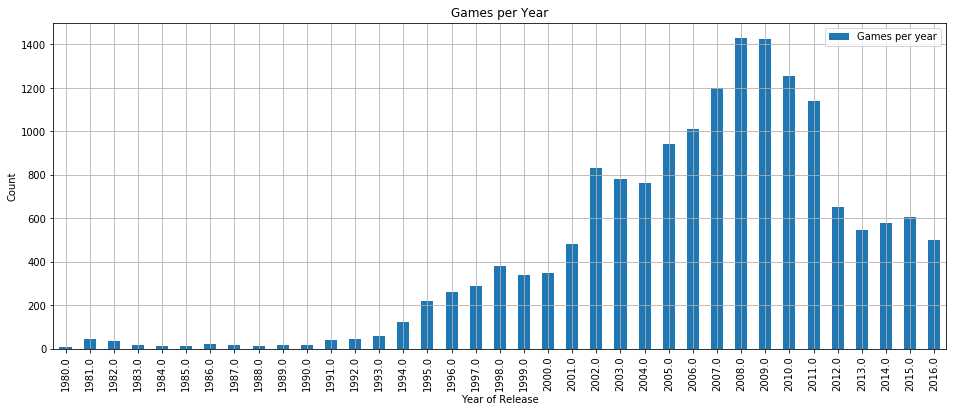

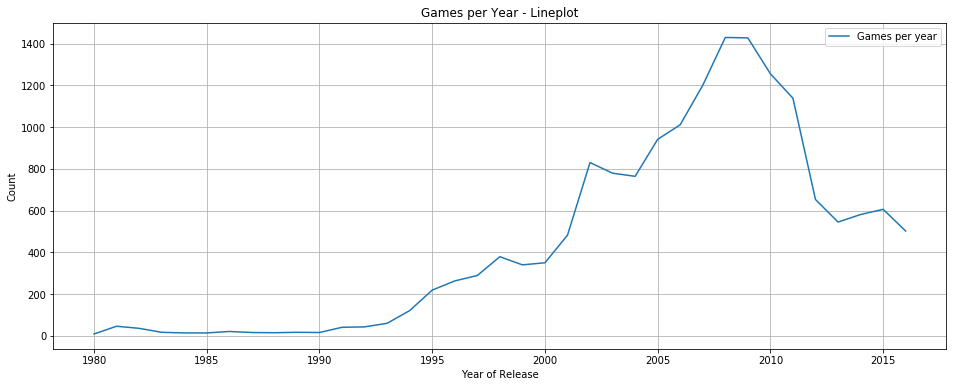

In [903]:
import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
ax2 = ax.twiny()
ax = games_per_year.plot(kind='bar',figsize=(16,6),grid=True,title='Games per Year')
ax2 = games_per_year.plot(kind='line',grid=True,title='Games per Year - Lineplot',figsize=(16,6))
ax.set_ylabel('Count')
ax.set_xlabel('Year of Release')
ax.legend(["Games per year"]);

ax2.set_ylabel('Count')
ax2.set_xlabel('Year of Release')
ax2.legend(["Games per year"]);

   

<div class="alert alert-block alert-info">
<b>To make it a bit clearer the second plot shows how from 1985 to 1994 games sales were flat, but then from 1994 to 2008(14 years in a row!) they just rose in a sharper manner but from 2009 up to now (2016) started to decline quite seriously. I would say that important period to analyze is the 1994-2008 period to understand that massive growth in sales </b> <a class="tocSkip"></a>
</div>

*****We can definetly see that there are defined periods for games sales*****

******************************************

**Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?**

In [904]:
# sales per platform
sales_per_platform = games2.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales','other_sales'],aggfunc='sum')
sales_per_platform['total'] = (sales_per_platform['eu_sales']+
                               sales_per_platform['jp_sales']+
                               sales_per_platform['na_sales']+
                               sales_per_platform['other_sales'])

In [905]:
games2['total_sales'] = (games2['eu_sales']+
                               games['jp_sales']+
                               games['na_sales']+
                               games['other_sales'])

In [906]:
games2['total_sales'] = games2[['eu_sales','jp_sales','na_sales','other_sales']].sum(axis=1)
games2.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,4.0,82.54


In [907]:
top_pltfrms_df = games2[['platform','total_sales']].groupby('platform').sum().sort_values('total_sales',
                                                                                        ).reset_index()

In [908]:
#divergent bar plots
top_pltfrms_df['sales_z'] = (top_pltfrms_df['total_sales'] - top_pltfrms_df['total_sales'].mean()) / top_pltfrms_df['total_sales'].std()
top_pltfrms_df.head()

,platform,total_sales,sales_z
0,PCFX,0.03,-0.825029
1,GG,0.04,-0.825000
2,3DO,0.10,-0.824826
3,TG16,0.16,-0.824653
4,WS,1.42,-0.821005


In [909]:
top_pltfrms_df['color'] = ['red' if x<0  else 'green' for x in top_pltfrms_df['sales_z'] ]
top_pltfrms_df.head()

,platform,total_sales,sales_z,color
0,PCFX,0.03,-0.825029,red
1,GG,0.04,-0.825000,red
2,3DO,0.10,-0.824826,red
3,TG16,0.16,-0.824653,red
4,WS,1.42,-0.821005,red


## Choose the platforms with the greatest total sales and build a distribution based on data for each year.

In [910]:
# Sometimes plots have caused problems, im loading matplotlib here just to make sure it works.
import matplotlib.pyplot as plt

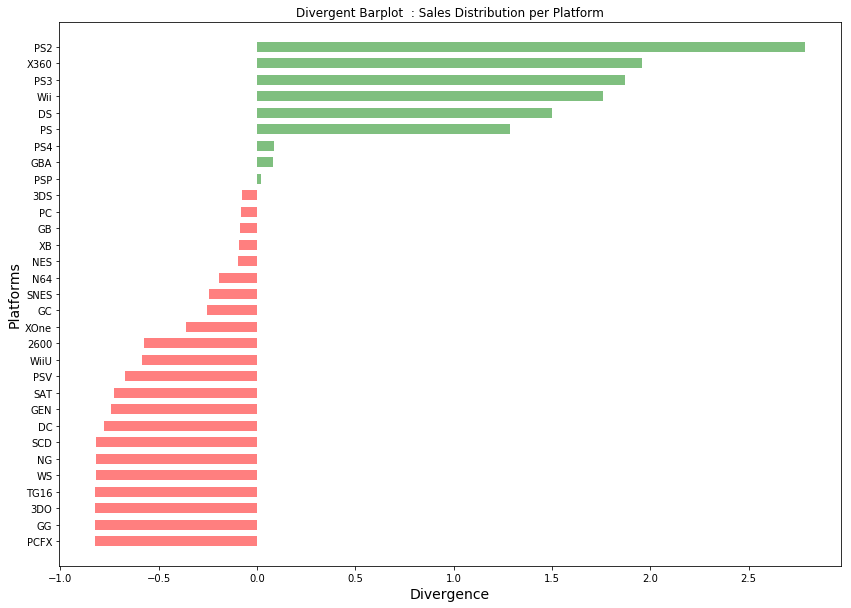

In [911]:
plt.figure(figsize=(14,10))
plt.hlines(y=top_pltfrms_df['platform'], xmax = top_pltfrms_df['sales_z'],xmin=0,
           color=top_pltfrms_df['color'],alpha=0.5,linewidth=10)
plt.title('Divergent Barplot  : Sales Distribution per Platform')
plt.xlabel('Divergence',fontsize=14)
plt.ylabel('Platforms',fontsize=14)
plt.show()

In [912]:
sales_per_platform.sort_values('total',ascending=False).head()

,eu_sales,jp_sales,na_sales,other_sales,total
platform,,,,,
PS2,337.10,137.63,580.42,192.38,1247.53
X360,268.37,12.31,596.28,84.92,961.88
PS3,327.21,79.41,390.13,134.59,931.34
Wii,258.32,68.28,487.98,77.79,892.37
DS,188.41,175.02,380.32,59.04,802.79


In [913]:
sales_df = games2.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(
    by='year_of_release')
sales_df.mean()

year_of_release    2002.460251
total_sales          36.967406
dtype: float64

#  Find platforms that used to be popular but now have zero sales

*************
- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
- Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [914]:
#so we'll take those platforms that exist from the year 2000
sales_df = sales_df[sales_df['year_of_release']>=2000]

In [915]:
#its imported at the begining, just making sure it loads
import matplotlib.pyplot as plt

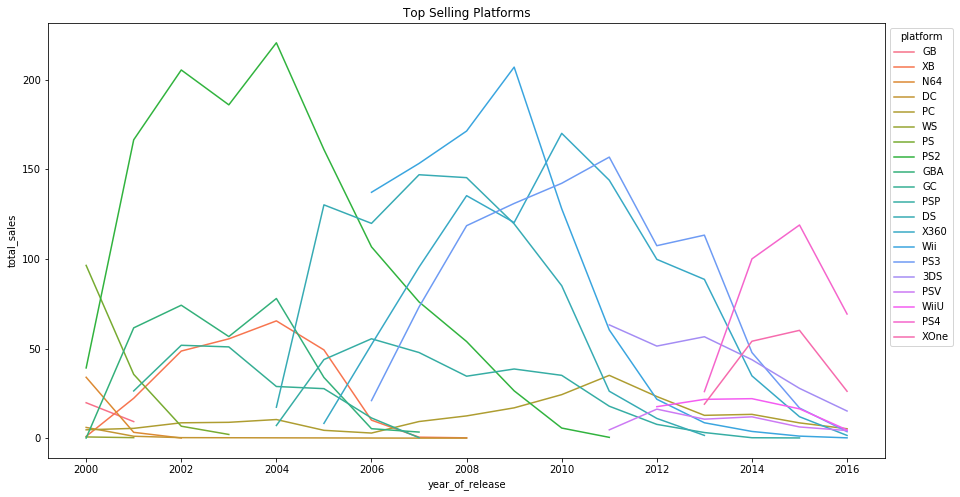

In [916]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=sales_df,x='year_of_release',y='total_sales',hue='platform')
ax.set_title('Top Selling Platforms')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


# How long does it generally take for new platforms to appear and old ones to fade?

*****instead can we ask whats the average lifetime of a platform?******

In [917]:
#platforms age
pltfrm_age =  sales_df.groupby('platform')['year_of_release'].agg(['min','max'])
pltfrm_age.head()

,min,max
platform,,
3DS,2011.0,2016.0
DC,2000.0,2008.0
DS,2004.0,2013.0
GB,2000.0,2001.0
GBA,2000.0,2007.0


In [918]:
pltfrm_age['age'] = pltfrm_age['max'] - pltfrm_age['min']
pltfrm_age = pltfrm_age.reset_index()
pltfrm_age

,platform,min,max,age
0,3DS,2011.0,2016.0,5.0
1,DC,2000.0,2008.0,8.0
2,DS,2004.0,2013.0,9.0
3,GB,2000.0,2001.0,1.0
4,GBA,2000.0,2007.0,7.0
5,GC,2001.0,2007.0,6.0
6,N64,2000.0,2002.0,2.0
7,PC,2000.0,2016.0,16.0
8,PS,2000.0,2003.0,3.0
9,PS2,2000.0,2011.0,11.0


In [919]:
print('The avereage  lifetime of any platform is  {:.1f} years \nand the median is {:.1f} years'.format(pltfrm_age['age'].mean(),
                                                                                             pltfrm_age['age'].median()))

The avereage  lifetime of any platform is  6.7 years 
and the median is 6.5 years


# Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

*****Because we see a serious decline on sales on all platforms since 2008 and because we see that the number of existing platforms by 2016 is only getting lower we need to pay attention to the what are relevant competing platforms, therefore we'll look at the data from 2014***** 


In [920]:
latest_sales_df = sales_df[sales_df['year_of_release']>=2014]

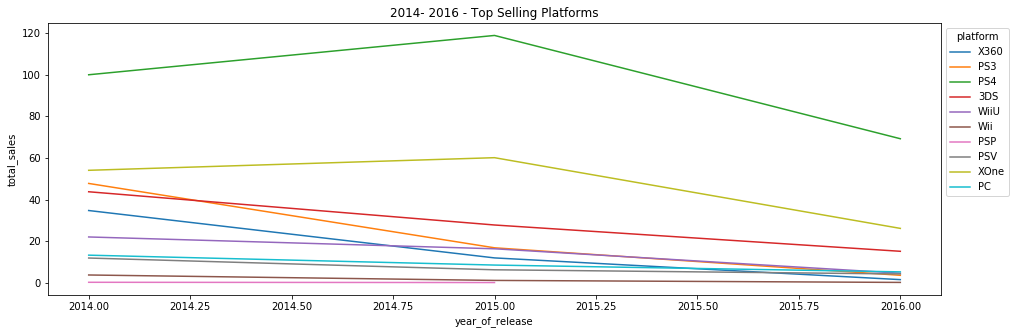

In [921]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(data=latest_sales_df,x='year_of_release',y='total_sales',hue='platform')
ax.set_title('2014- 2016 - Top Selling Platforms')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

- Aparently games sales are declining since 2015
- As for the most profitable for 2016 : Ps4, XOne, 3DS .
- PSP stopped selling and the Wii with X360 show the gratest decline

In [922]:
latest_sales_df[latest_sales_df['year_of_release']==2016].sort_values('total_sales',ascending=False)

,platform,year_of_release,total_sales
156,PS4,2016.0,69.25
238,XOne,2016.0,26.15
17,3DS,2016.0,15.14
118,PC,2016.0,5.25
212,WiiU,2016.0,4.60
174,PSV,2016.0,4.25
152,PS3,2016.0,3.60
224,X360,2016.0,1.52
207,Wii,2016.0,0.18


# Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

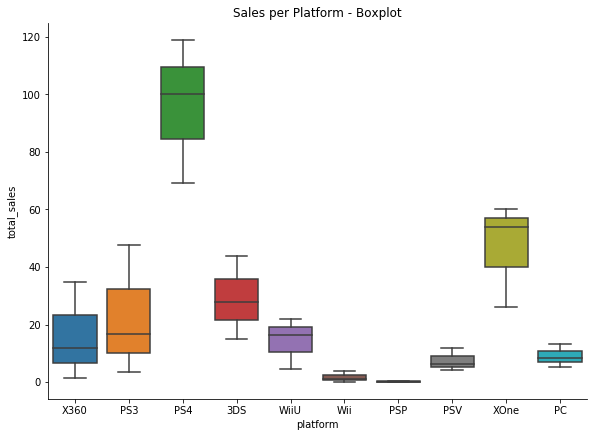

In [923]:
g=sns.catplot(x="platform", y="total_sales", kind="box", data=latest_sales_df,height=6, aspect=1.4).set(title='Sales per Platform - Boxplot')
plt.show()

In [924]:
#averages
sales_means = latest_sales_df.groupby('platform')['total_sales'].mean().reset_index().sort_values('total_sales',ascending=False)

In [925]:
all_sales_means = sales_df.groupby('platform')['total_sales'].mean().reset_index().sort_values('total_sales',ascending=False)

In [926]:
sales_means

,platform,total_sales
3,PS4,96.050000
9,XOne,46.786667
0,3DS,28.893333
2,PS3,22.726667
8,X360,16.073333
7,WiiU,14.326667
1,PC,9.016667
5,PSV,7.466667
6,Wii,1.690000
4,PSP,0.180000


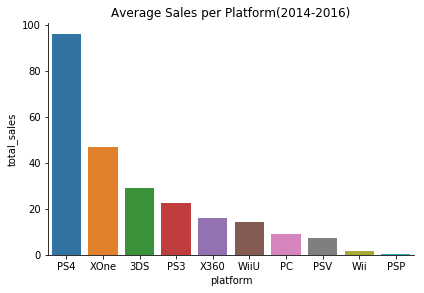

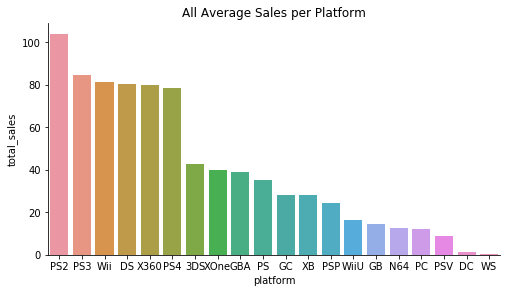

In [927]:
g=sns.catplot(x="platform", y="total_sales", kind="bar", data=sales_means,height=4, aspect=1.5).set(
    title='Average Sales per Platform(2014-2016)')
plt.show()
#------------------------------------------------
g=sns.catplot(x="platform", y="total_sales", kind="bar", data=all_sales_means,height=4, aspect=1.8).set(title='All Average Sales per Platform')
plt.show()

*****In this context we can see how the PS4 is the leading platform in sales for the latest years and by a lot*****

 ******************************
# Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [928]:
games2.stb.missing(style=True)

,missing,total,percent
esrb,"4,314","16,469",26.19%
critic_score,"1,097","16,469",6.66%
user_score,"1,097","16,469",6.66%
name,0,"16,469",0.00%
platform,0,"16,469",0.00%
year_of_release,0,"16,469",0.00%
genre,0,"16,469",0.00%
na_sales,0,"16,469",0.00%
eu_sales,0,"16,469",0.00%
jp_sales,0,"16,469",0.00%


In [929]:
#ps4
ps4_df =  games2[games2['platform']=='PS4']

In [930]:
ps4_df.stb.missing(style=True)

,missing,total,percent
esrb,2,392,0.51%
name,0,392,0.00%
platform,0,392,0.00%
year_of_release,0,392,0.00%
genre,0,392,0.00%
na_sales,0,392,0.00%
eu_sales,0,392,0.00%
jp_sales,0,392,0.00%
other_sales,0,392,0.00%
critic_score,0,392,0.00%


In [931]:
ps4_df = ps4_df.dropna()

Let's buld a correlation matrix and then the correlation table

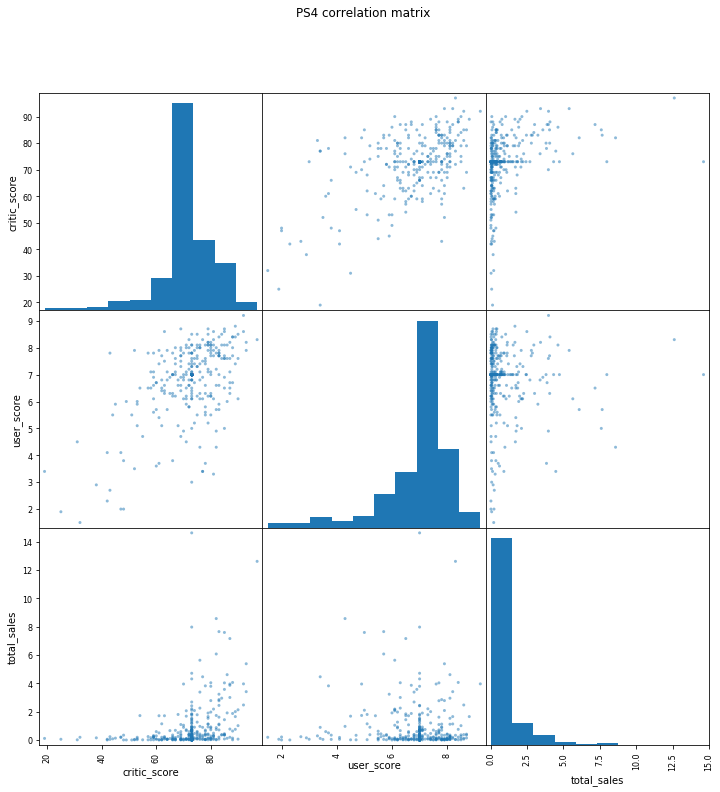

In [932]:
ps4_corr_df = ps4_df[['critic_score','user_score','total_sales']]
pd.plotting.scatter_matrix(ps4_corr_df,figsize=(12,12))
plt.suptitle('PS4 correlation matrix')
plt.show()

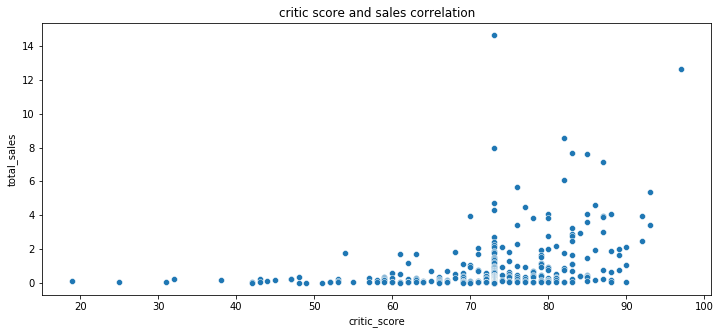

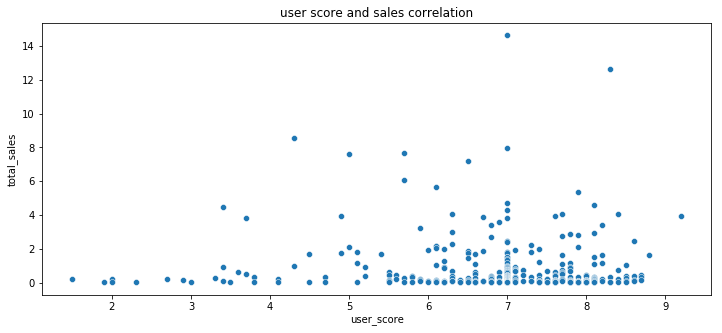

In [933]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=ps4_corr_df, x="critic_score", y="total_sales").set_title('critic score and sales correlation')
plt.show()
#------------------------------------------------
plt.figure(figsize=(12,5))
sns.scatterplot(data=ps4_corr_df, x="user_score", y="total_sales").set_title('user score and sales correlation')
plt.show()

In [934]:
ps4_corr_df.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.547175,0.325466
user_score,0.547175,1.000000,-0.039048
total_sales,0.325466,-0.039048,1.000000


**Although not decisive we can conclude that critic's score are correlated in some measure with the sales of games in the PS4 platform**

<div class="alert alert-block alert-info">
<b>I agree, 'some measure' is not very high. On a deeper thought and by some experience as a (sometimes lazy) gamer I would rely on critic reviews and scores to buy a game</b> <a class="tocSkip"></a>
</div>

**********************
# Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [935]:
names_df = games2[(games2['year_of_release']>=2013) & games2['name']].groupby('name').count().reset_index()

In [936]:
names_df[names_df['platform']>5][['name','platform']]

,name,platform
27,Adventure Time: Finn & Jake Investigations,6
48,Angry Birds Star Wars,8
66,Assassin's Creed IV: Black Flag,6
140,Call of Duty: Ghosts,6
246,Disney Infinity,6
247,Disney Infinity 2.0: Marvel Super Heroes,6
333,FIFA 14,9
334,FIFA 15,8
522,Just Dance 2014,6
523,Just Dance 2015,6


In [937]:
#lets check games that are on multiplbe platforms  -  one personal favorite
terraria_df= games2[(games2['name']=='Terraria')][['name','platform','total_sales','year_of_release','critic_score']]
terraria_df

,name,platform,total_sales,year_of_release,critic_score
3014,Terraria,X360,0.68,2013.0,81.0
4685,Terraria,PS3,0.41,2013.0,81.0
8991,Terraria,PC,0.14,2011.0,83.0
10576,Terraria,PSV,0.10,2013.0,85.0
11168,Terraria,3DS,0.09,2016.0,71.0
12228,Terraria,PS4,0.07,2014.0,83.0
13787,Terraria,XOne,0.04,2014.0,84.0
14571,Terraria,WiiU,0.03,2016.0,73.5


In [938]:
minecraft_df= games2[(games2['name']=='Minecraft')][['name','platform','total_sales','year_of_release','critic_score']]
minecraft_df

,name,platform,total_sales,year_of_release,critic_score
72,Minecraft,X360,9.18,2013.0,71.0
180,Minecraft,PS3,5.27,2014.0,73.0
261,Minecraft,PS4,4.32,2014.0,73.0
543,Minecraft,XOne,2.76,2014.0,76.0
868,Minecraft,PSV,1.96,2014.0,71.0
2973,Minecraft,WiiU,0.67,2016.0,73.5


In [939]:
gtaV_df= games2[(games2['name']=='Grand Theft Auto V')][['name','platform','total_sales','year_of_release','critic_score']]
gtaV_df

,name,platform,total_sales,year_of_release,critic_score
16,Grand Theft Auto V,PS3,21.05,2013.0,97.0
23,Grand Theft Auto V,X360,16.27,2013.0,97.0
42,Grand Theft Auto V,PS4,12.62,2014.0,97.0
165,Grand Theft Auto V,XOne,5.47,2014.0,97.0
1730,Grand Theft Auto V,PC,1.17,2015.0,96.0


*****Looking at indivdual games we cannot make a conclusion about which platform sales more games, but a game with good critic scores that is ported to various platforms is guarantee good sales. Terraria btw is now a cult classic*****

# Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [940]:
genre_df = games2[['genre','total_sales']].groupby('genre').sum().reset_index().sort_values('total_sales',ascending=False)

g3 =  games2[games2['year_of_release']>=2014] # the latest data

genre_latest_df = g3[['genre','total_sales']].groupby('genre').sum().reset_index().sort_values('total_sales',ascending=False)


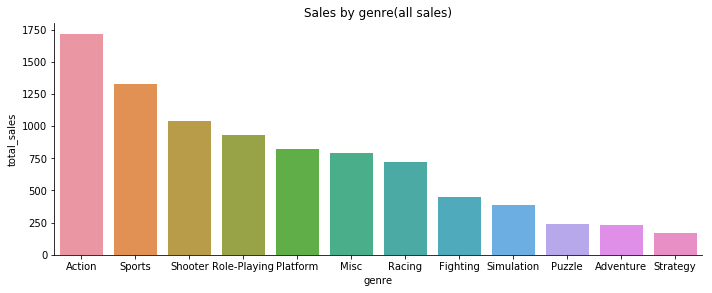

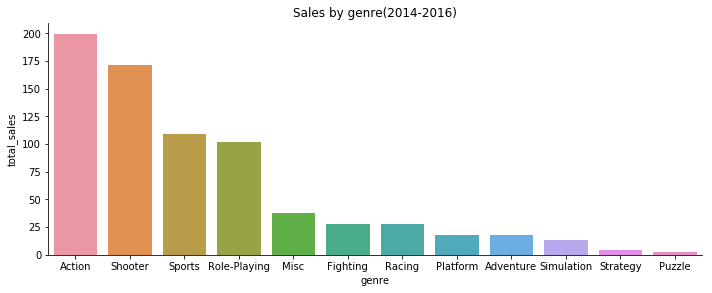

In [941]:
g=sns.catplot(x="genre", y="total_sales", kind="bar", data=genre_df,height=4, aspect=2.5).set(title='Sales by genre(all sales)')
plt.show()
#-----------------------------------------------
g=sns.catplot(x="genre", y="total_sales", kind="bar", data=genre_latest_df,height=4, aspect=2.5).set(title='Sales by genre(2014-2016)')
plt.show()

*****Action, Sports and Shooters lead the way in the general view of the sales data, but we cannot generalize as we see that in the latest years diferent genres have either move up or down on sales, also this means that in the future newer consoles might draw the sales toward them with different genres leading*****

# Step 4. Create a user profile for each region
For each region (NA, EU, JP), determine:
- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

In [942]:
#taking data from the later years 2014-2016
g3.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'esrb',
       'total_sales'],
      dtype='object')

In [943]:
#NA
north_america_df =  g3[['name','platform','year_of_release','genre','critic_score','user_score','esrb','na_sales']]
#EU
eu_df =  g3[['name','platform','year_of_release','genre','critic_score','user_score','esrb','eu_sales']]
#JP
jp_df = g3[['name','platform','year_of_release','genre','critic_score','user_score','esrb','jp_sales']]

In [944]:
#top 5 platforms
na_top_five_df = (north_america_df[['platform','na_sales']].groupby('platform').sum()
               .sort_values('na_sales',ascending=False).head()
              )
eu_top_five_df = (eu_df[['platform','eu_sales']].groupby('platform').sum()
               .sort_values('eu_sales',ascending=False).head()
              )
jp_top_five_df = (jp_df[['platform','jp_sales']].groupby('platform').sum()
               .sort_values('jp_sales',ascending=False).head()
              )

***display two pandas tables side by side***

In [945]:
#...from stackoverflow
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [946]:
display_side_by_side(na_top_five_df,eu_top_five_df,jp_top_five_df, titles=['NA','EU','JP'])

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
,eu_sales
platform,
PS4,130.04
XOne,46.25


*****We can see the dominance of the PS4 in north america and Europe while in Japan the 3DS is the one who leads. Its interesting to see that PC has foothold in Europe and in Japan Nintendo and Sony compete fiercely with Microsoft Xbox not in sight.*****

In [947]:
#top 5 genres
na_top_five_g_df = (north_america_df[['genre','na_sales']].groupby('genre').sum()
               .sort_values('na_sales',ascending=False).head()
              )
eu_top_five_g_df = (eu_df[['genre','eu_sales']].groupby('genre').sum()
               .sort_values('eu_sales',ascending=False).head()
              )
jp_top_five_g_df = (jp_df[['genre','jp_sales']].groupby('genre').sum()
               .sort_values('jp_sales',ascending=False).head()
              )

In [948]:
display_side_by_side(na_top_five_g_df,eu_top_five_g_df,jp_top_five_g_df, titles=['NA','EU','JP'])

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
,eu_sales
genre,
Action,74.68
Shooter,65.52


*****While we see the massive sales in NA and EU the difference in the top categories might point out to the differnce in culture - the west vs far east.*****

# Do ESRB ratings affect sales in individual regions?

**Although the numerical ESRB ratings that I applyed are not reliable to make any calculation, I think that if I take those ratings that are full integers might help understand this question because they represent the original ESRB rating**

In [949]:
g_esrb = g3[g3['esrb']%1 == 0]
g_esrb.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'esrb',
       'total_sales'],
      dtype='object')

In [950]:
#NA
north_america_df =  g_esrb[['name','platform','year_of_release','genre','critic_score','user_score','esrb','na_sales']]
#EU
eu_df =  g_esrb[['name','platform','year_of_release','genre','critic_score','user_score','esrb','eu_sales']]
#JP
jp_df = g_esrb[['name','platform','year_of_release','genre','critic_score','user_score','esrb','jp_sales']]

In [951]:
na_top_df = (north_america_df[['esrb','na_sales']].groupby('esrb').sum()
               .sort_values('na_sales',ascending=False).head(10)
              )
eu_top_df = (eu_df[['esrb','eu_sales']].groupby('esrb').sum()
               .sort_values('eu_sales',ascending=False).head(10)
              )
jp_top_df = (jp_df[['esrb','jp_sales']].groupby('esrb').sum()
               .sort_values('jp_sales',ascending=False).head(10)
              )

In [952]:
#esrb_map={'RP':0,'EC':1,'E10+':2,'T':3,'E':4,'K-A':4,'M':5,'AO':5}
esrb_map2={0:'RP',
           1:'RC',
           2:'E10+',
           3:'T',
           4:'E',          
           5:'M',
          }

In [953]:
#mapping values to ESRB ratings
na_top_df.index = na_top_df.index.map(esrb_map2) 
eu_top_df.index = eu_top_df.index.map(esrb_map2) 

In [954]:
jp_top_df.index = jp_top_df.index.map(esrb_map2)

In [955]:
display_side_by_side(na_top_df,eu_top_df,jp_top_df, titles=['NA','EU','JP'])

,na_sales
esrb,
M,99.43
E,70.88
T,64.39
E10+,42.75
,eu_sales
esrb,
M,96.15
E,76.96
T,58.45


**Adding pie charts**

In [961]:
na_top_df['percent'] = na_top_df['na_sales']/na_top_df['na_sales'].sum()
eu_top_df['percent'] = eu_top_df['eu_sales']/eu_top_df['eu_sales'].sum()
jp_top_df['percent'] = jp_top_df['jp_sales']/jp_top_df['jp_sales'].sum()

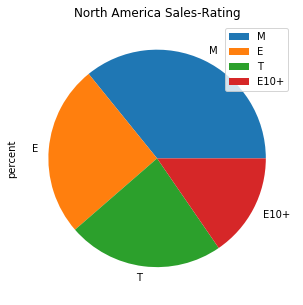

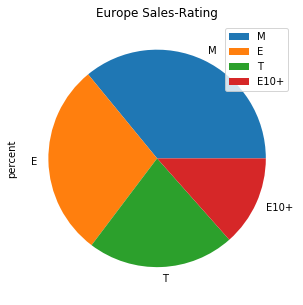

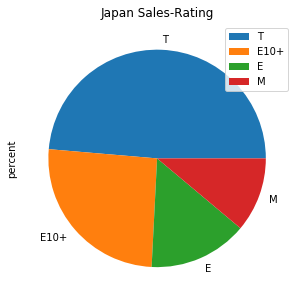

In [965]:
na_plot = na_top_df.plot.pie(y='percent', figsize=(5, 5))
plt.title('North America Sales-Rating')
plt.show()
#--------------------
eu_plot = eu_top_df.plot.pie(y='percent', figsize=(5, 5))
plt.title('Europe Sales-Rating')
plt.show()
#--------------------
jp_top_df = jp_top_df.plot.pie(y='percent', figsize=(5, 5))
plt.title('Japan Sales-Rating')
plt.show()

<div class="alert alert-block alert-info">
<b>With the pie charts its even more evident how the Teen rating in japan is almost half of the sales and how Europe and North America are quite similar.</b> <a class="tocSkip"></a>
</div>

EC = Early Childhood E = EVERYONE E10+ = EVERYONE 10+ T = TEEN M = Mature RP = RATING PENDING K-A = Kids to Adults AO = Adults Only

KA and E -can be merged M - AO - can be merged (for the sake of simplifying the ratings)

*****Here we see again how Europe and North America markets are so similar but so different to Japan. I wouldnt say that ESRB ratings affect sales instead I think that it happens that the top sales per region happen to have that specific rating.*****

# Step 5. Test the following hypotheses:
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.
- - Set the alpha threshold value yourself.
- Explain:
- How you formulated the null and alternative hypotheses
- What significance level you chose to test the hypotheses, and why

**H0 = Average user ratings of the Xbox One and PC platforms are the same**
- To test H0 we'll take all the user scores from XOne and Pc and create a set for each platform, we'll test the hypotheses by taking 50 random samples from each.

In [1279]:
pltfrm_age[(pltfrm_age['platform']=='XOne')|(pltfrm_age['platform']=='PC')]

,platform,min,max,age
7,PC,2000.0,2016.0,16.0
19,XOne,2013.0,2016.0,3.0


In [1389]:
#we'll take data from 2013 , create 2 sets of all user_scores for XOne and PC
g4 =  games2[games2['year_of_release']>=2013]

In [1390]:
g4 = g4[['platform','user_score']]

In [1391]:
g4 = g4[(g4['platform']=='XOne')|(g4['platform']=='PC')]

In [1392]:
g4[(g4['platform']=='XOne')].shape[0] , g4[(g4['platform']=='PC')].shape[0]

(247, 190)

In [1393]:
247-190
#need to drop 57 rows from XOne

57

In [1394]:
x_one_u_scores= pd.DataFrame(g4.loc[g4['platform']=='XOne','user_score'].reset_index())

In [1395]:
x_one_u_scores = x_one_u_scores.drop(columns='index')

In [1396]:
#x_one_u_scores = x_one_u_scores.iloc[0:190]

In [1397]:
x_one_u_scores.shape[0]

247

In [1398]:
pc_u_scores = pd.DataFrame(g4.loc[g4['platform']=='PC','user_score'].reset_index())

In [1399]:
pc_u_scores = pc_u_scores.drop(columns='index')

In [1400]:
pc_u_scores.shape[0],x_one_u_scores.shape[0]

(190, 247)

In [1432]:
sample1 = x_one_u_scores.sample(50)
sample2 = pc_u_scores.sample(50)
alpha = 0.05  

results = st.ttest_ind(sample1, sample2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  [0.05271012]
We can't reject the null hypothesis


*****This points out that there is a similarity between PC and  XOne - and this aligns with the fact that there are games made for PC and XOne at the same time*****

***************
**H1 = Average user ratings for the Action and Sports genres are different.**
- To test H1 we'll take all the user scores for the Action and Sport genres and create a set for each platform, we'll test the hypotheses by taking 50 random samples from each.

In [1420]:
#taking data from the g3 -2014 ->2016 
g5 = g3[['genre','user_score']]

In [1421]:
g5 = g5[(g5['genre']=='Action')|(g5['genre']=='Sports')]

In [1422]:
action_df = pd.DataFrame(g5.loc[g5['genre']=='Action','user_score'].reset_index())

In [1423]:
action_df = action_df.drop(columns='index')

In [1424]:
action_df.shape[0]

619

In [1425]:
g5.groupby('genre').count()

,user_score
genre,
Action,619
Sports,161


In [1426]:
sports_df = pd.DataFrame(g5.loc[g5['genre']=='Sports','user_score'].reset_index())

In [1427]:
sports_df = sports_df.drop(columns='index')

In [1428]:
sports_df.shape[0]

161

In [1437]:
# i choose a very small alpha to give an ample window to the hypotheses to see how Action and sport do not differ
sample1 = action_df.sample(50)
sample2 = sports_df.sample(50)
alpha = 0.01  

results = st.ttest_ind(action_df, sports_df)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We can't reject the hypothesis ")
else:
    print("We reject the hypothesis ") 

p-value:  [2.47879425e-33]
We can't reject the hypothesis


*****This means that there is a difference between user scores for Action and sports, even after lowering the alpha much more*****


# Conclusion: 


*****The simplest and most effective campaign is to  use the newest consoles -Ps4 and XOne -  within the Action and Shooter categories  with the best critic scores to lure more buyers to the store. But it is importand to undestand how the industry is always in flux as new games and new consoles keep popping up. With more advanced tools like machine learning we could refine the data even more and more precisely.Another insight is how games are moslty for adults, but we can see how in Japan Nintendo has a grip in the market with games as they are one of the most original innovators and not only that - they have a very loyal following with gamers that grew up on their I.p like Mario and Zelda.*****

*****To reitarate I added two plots bellow*****

<div class="alert alert-block alert-info">
<b>Recomendation : Because Ice sells games all over the world I would recomend to market Action and Shooter games that are ported to the latest platforms, but to include also Nintendo games for the Japanese market that way the most profitable markets are covered.</b> <a class="tocSkip"></a>
</div>

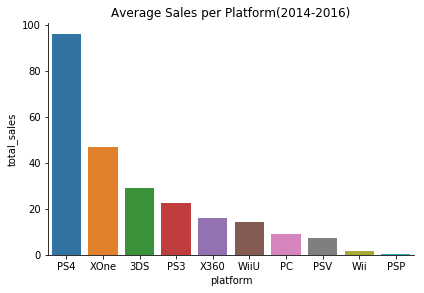

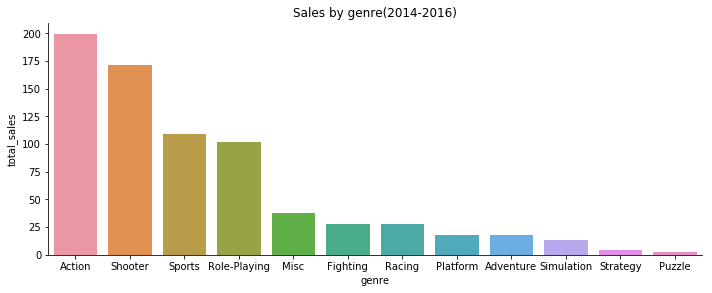

In [966]:
g=sns.catplot(x="platform", y="total_sales", kind="bar", data=sales_means,height=4, aspect=1.5).set(
    title='Average Sales per Platform(2014-2016)')
plt.show()
#-----------------
g=sns.catplot(x="genre", y="total_sales", kind="bar", data=genre_latest_df,height=4, aspect=2.5).set(title='Sales by genre(2014-2016)')
plt.show()